<a href="https://colab.research.google.com/github/DonaldTurton/iLab2/blob/Donald-modelling/Mdoelling_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ILab2

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Set BITFINIX EXCHANGE - DAILY

## Bitcoin

In [ ]:
BITC_BITFINIX_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Bitcoin/BITFINEX_BTCUSD%2C%201D.csv"

bitcoin_daily = pd.read_csv (BITC_BITFINIX_url)

### Ethereum

In [ ]:
ETHERIUM_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ethereum/BITFINEX_ETHUSD%2C%201D.csv'

In [ ]:
ethereum_daily = pd.read_csv(ETHERIUM_BITFINIX_url) 

### Ripple 

In [ ]:
RIPPLE_BITFINIX_url= 'https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Ripple/BITFINEX_XRPUSD%2C%201D.csv'

In [ ]:
ripple_daily = pd.read_csv(RIPPLE_BITFINIX_url)

## Subset DF

## Subset DF

In [ ]:
bit_bit = bitcoin_daily[['time','open', 'close', 'Volume']]
bit_bit = bit_bit.rename(columns={'open': 'BTC_open', 'close': 'BTC_close', 'Volume': 'BTC_vol'})

In [ ]:
eth_bit = ethereum_daily[['time','open', 'close', 'Volume']]
eth_bit = eth_bit.rename(columns={'open': 'ETHER_open', 'close': 'ETHER_close', 'Volume': 'ETHER_vol'})

In [ ]:
xrp_bit = ripple_daily[['time','open', 'close', 'Volume']]
xrp_bit = xrp_bit.rename(columns={'open': 'XRP_open', 'close': 'XRP_close', 'Volume': 'XRP_vol'})

## Merge



In [ ]:
# Data frames for each coin from BITFINEX
#bit_bit 2,677 observations
#eth_bit 1,497 observations
#xrp_bit 1,176 observations

In [ ]:
bit_eth = pd.merge(bit_bit, eth_bit, how='left', on=['time'])
data = pd.merge(bit_eth, xrp_bit, how='left', on=['time'])

In [ ]:
#Drop NA 
data = data.dropna()
len(data) #1,174 observations after removing NA

1174

# Lag the predictor variables 7 days

In [ ]:
# Duplicate the bitcoin variables before lagging
data['BTC_open_dup'] = data['BTC_open'] 
data['BTC_close_dup'] = data['BTC_close']
data['BTC_vol_dup'] = data['BTC_vol']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Remove the BTC open and BTC vol variables before lagging as they  can't be used for this type of modelling strategy. 
data = data.drop(['BTC_open', 'BTC_vol'], axis = 1)

In [ ]:
# Lag all variables except BTC_close

data['ETHER_open'] = data['ETHER_open'].shift(7)
data['ETHER_close'] = data['ETHER_close'].shift(7)
data['ETHER_vol'] = data['ETHER_vol'].shift(7)

data['XRP_open'] = data['XRP_open'].shift(7)
data['XRP_close'] = data['XRP_close'].shift(7)
data['XRP_vol'] = data['XRP_vol'].shift(7)

data['BTC_open_dup'] = data['BTC_open_dup'].shift(7)
data['BTC_close_dup'] = data['BTC_close_dup'].shift(7)
data['BTC_vol_dup'] = data['BTC_vol_dup'].shift(7)

In [ ]:
# Drop the first 7 rows of the data set as these are NA rows due to the lagging. 
data.drop(data.head(7).index, inplace=True)

# Set the test and train sets

In [ ]:
# Set the  data index as a data col
data.index = range(1,1168)

In [ ]:
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data[1:1071]
test_may = data[1071:1078]

In [ ]:
# July train and test sets
train_july = data[1:1132]
test_july = data[1132:1139]

# Donald Modelling

In [ ]:
# DATA FRAME WITH DATES AS INDEX FOR PLOTS IN X AXIS
data2 = data

# Convert Date column to Date format.  
data2["time"] = pd.to_datetime(data2["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'

#Set Date as Index
data2 = data2.set_index('time')#.asfreq('d')

,BTC_close,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol,BTC_open_dup,BTC_close_dup,BTC_vol_dup
time,,,,,,,,,,
2017-05-26 00:00:00+00:00,2125.900000,98.550000,124.400000,2.579564e+05,0.37999,0.32498,2.130933e+06,1941.900000,1966.500000,23001.542773
2017-05-27 00:00:00+00:00,1980.200000,124.490000,123.030000,1.228824e+05,0.32499,0.34716,3.608873e+06,1966.500000,2059.300000,21690.022393
2017-05-28 00:00:00+00:00,2056.900000,123.490000,146.140000,2.201843e+05,0.34700,0.32700,2.597807e+06,2059.300000,2026.600000,17221.878675
2017-05-29 00:00:00+00:00,2207.400000,146.140000,154.920000,4.737065e+05,0.32700,0.29717,6.474949e+06,2027.000000,2087.300000,57231.824243
2017-05-30 00:00:00+00:00,2146.700000,155.160000,168.240000,1.449889e+05,0.29912,0.32158,3.255225e+06,2087.300000,2249.600000,22521.559138
2017-05-31 00:00:00+00:00,2191.825454,168.250000,183.880000,1.845967e+05,0.32000,0.28860,4.288168e+06,2249.200000,2395.500000,29620.827843
2017-06-01 00:00:00+00:00,2312.000000,183.880000,168.710000,2.467305e+05,0.28860,0.23820,8.004758e+06,2395.500000,2268.100000,55075.881722
2017-06-02 00:00:00+00:00,2405.900000,168.730000,152.800000,1.861505e+05,0.23820,0.25900,6.493159e+06,2268.200000,2125.900000,39694.888253
2017-06-03 00:00:00+00:00,2461.000000,153.500000,149.990000,3.622742e+05,0.25881,0.20142,9.369146e+06,2126.000000,1980.200000,47132.386730


In [ ]:
#COPY FOR DATA2
# May train and test sets
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_may = data2[1:1071]
test_may = data2[1071:1078]

## MAY Pred

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']
# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']

In [ ]:
# Random Forest tunning 
RandomForestRegression = RandomForestRegressor(n_estimators=500)

In [ ]:

RandomForestRegression.fit(x_train_may, y_train_may)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_prediction = RandomForestRegression.predict(x_test_may)
y_prediction

array([7892.26362255, 8046.71880346, 7430.88908581, 7120.318591  ,
       7565.20823302, 8306.07116478, 7797.66485573])

In [ ]:
rf_mse = mean_squared_error(y_test_may, y_prediction)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1441.2077497411042

In [ ]:
y_test_may = pd.DataFrame(y_test_may)
#y_test_may['index'] = range(1,8)
y_test_may

,BTC_close
time,
2020-05-01 00:00:00+00:00,8822.800000
2020-05-02 00:00:00+00:00,8982.300000
2020-05-03 00:00:00+00:00,8899.800000
2020-05-04 00:00:00+00:00,8865.800000
2020-05-05 00:00:00+00:00,9020.100000
2020-05-06 00:00:00+00:00,9152.470993
2020-05-07 00:00:00+00:00,9979.600000


In [ ]:
y_prediction = pd.DataFrame(y_prediction)
y_prediction.index=y_test_may.index
y_prediction.columns=['Prediction']
#y_prediction['index'] = range(1,8)
y_prediction

,Prediction
time,
2020-05-01 00:00:00+00:00,7892.263623
2020-05-02 00:00:00+00:00,8046.718803
2020-05-03 00:00:00+00:00,7430.889086
2020-05-04 00:00:00+00:00,7120.318591
2020-05-05 00:00:00+00:00,7565.208233
2020-05-06 00:00:00+00:00,8306.071165
2020-05-07 00:00:00+00:00,7797.664856


In [ ]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual = y_test_may.join(y_prediction)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

#PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

PredictionVSactual

,BTC_close,Prediction
time,,
2020-05-01 00:00:00+00:00,8822.800000,7892.263623
2020-05-02 00:00:00+00:00,8982.300000,8046.718803
2020-05-03 00:00:00+00:00,8899.800000,7430.889086
2020-05-04 00:00:00+00:00,8865.800000,7120.318591
2020-05-05 00:00:00+00:00,9020.100000,7565.208233
2020-05-06 00:00:00+00:00,9152.470993,8306.071165
2020-05-07 00:00:00+00:00,9979.600000,7797.664856


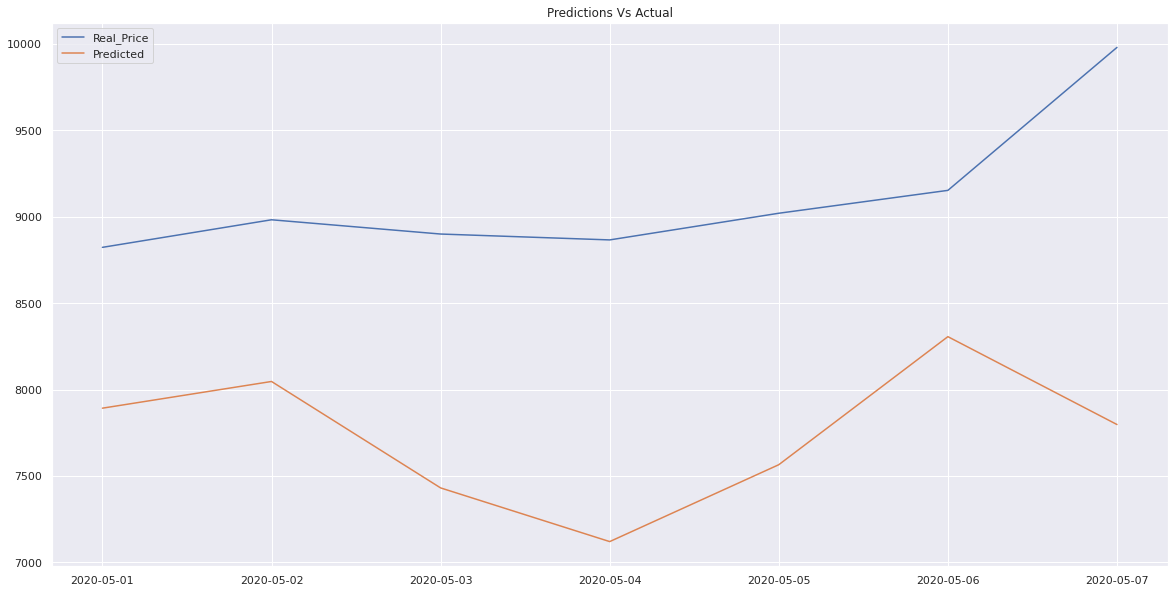

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual)
plt.title("Predictions Vs Actual")
plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

## July

In [ ]:
#COPY 
# July train and test sets
train_july = data2[1:1132]
test_july = data2[1132:1139]

In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']
# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']

In [ ]:
RandomForestRegression.fit(x_train_july, y_train_july)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_prediction_july = RandomForestRegression.predict(x_test_july)
y_prediction_july

array([9349.09889911, 9356.90982048, 9113.36028397, 9344.12561583,
       9218.13237576, 9239.53598522, 9167.01052002])

In [ ]:
rf_mse = mean_squared_error(y_test_july, y_prediction_july)
rf_mse

rf_rmse = np.sqrt(rf_mse)
rf_rmse

151.61844385253121

In [ ]:
y_test_july = pd.DataFrame(y_test_july)
#y_test_may['index'] = range(1,8)
y_test_july

,BTC_close
time,
2020-07-01 00:00:00+00:00,9239.900000
2020-07-02 00:00:00+00:00,9100.000000
2020-07-03 00:00:00+00:00,9073.200000
2020-07-04 00:00:00+00:00,9147.700000
2020-07-05 00:00:00+00:00,9084.284734
2020-07-06 00:00:00+00:00,9361.100000
2020-07-07 00:00:00+00:00,9267.514949


In [ ]:
y_prediction_july = pd.DataFrame(y_prediction_july)
y_prediction_july.index=y_test_july.index
y_prediction_july.columns=['Prediction']
#y_prediction['index'] = range(1,8)
y_prediction_july

,Prediction
time,
2020-07-01 00:00:00+00:00,9349.098899
2020-07-02 00:00:00+00:00,9356.909820
2020-07-03 00:00:00+00:00,9113.360284
2020-07-04 00:00:00+00:00,9344.125616
2020-07-05 00:00:00+00:00,9218.132376
2020-07-06 00:00:00+00:00,9239.535985
2020-07-07 00:00:00+00:00,9167.010520


In [ ]:
#Merge predicted vs actual 
#PredictionVSactual = y_test_may.merge(y_prediction, on=None, how='left')

PredictionVSactual = y_test_july.join(y_prediction_july)


#PredictionVSactual = PredictionVSactual.set_index('time')
#PredictionVSactual.columns=['Prediction','Index' ,'Real']

#PredictionVSactual = PredictionVSactual[['Prediction', 'Real']]

PredictionVSactual

,BTC_close,Prediction
time,,
2020-07-01 00:00:00+00:00,9239.900000,9349.098899
2020-07-02 00:00:00+00:00,9100.000000,9356.909820
2020-07-03 00:00:00+00:00,9073.200000,9113.360284
2020-07-04 00:00:00+00:00,9147.700000,9344.125616
2020-07-05 00:00:00+00:00,9084.284734,9218.132376
2020-07-06 00:00:00+00:00,9361.100000,9239.535985
2020-07-07 00:00:00+00:00,9267.514949,9167.010520


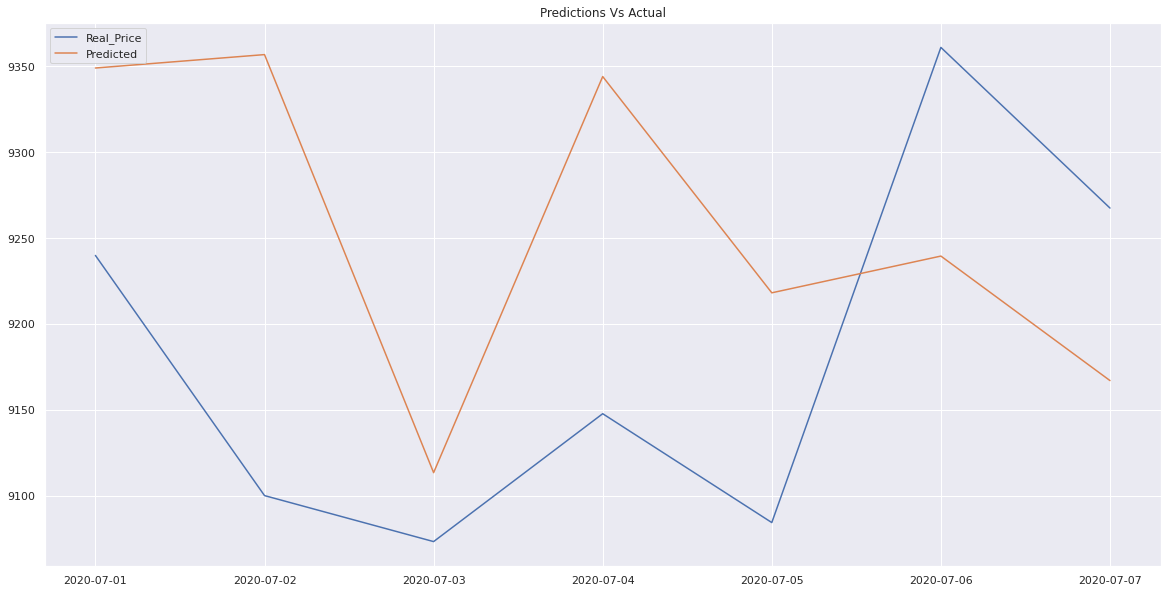

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10)})

# plot
plt.plot(PredictionVSactual)
plt.title("Predictions Vs Actual")
plt.legend(['Real_Price','Predicted'],loc='upper left')
plt.show()

# **Rob Modelling**

#  Set test and train sets


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for MAY
x_train_may = train_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_may = train_may['BTC_close']

# Setup testing x and y variables
x_test_may = test_may[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_may = test_may['BTC_close']


In [ ]:
# Select the independent variables for the first experiment in 'x' and the dependent variable 'y' for JULY
x_train_july = train_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_train_july = train_july['BTC_close']

# Setup testing x and y variables
x_test_july = test_july[['ETHER_open', 'ETHER_close', 'ETHER_vol', 'XRP_open', 'XRP_close', 'XRP_vol', 'BTC_open_dup', 'BTC_close_dup', 'BTC_vol_dup']]
y_test_july = test_july['BTC_close']


# Linear Model - May

In [ ]:
# Import the requried packages for the linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_may, y_train_may)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_may,x_train_may).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              7349.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        04:11:32   Log-Likelihood:                         -8884.2
No. Observations:                1070   AIC:                                  1.779e+04
Df Residuals:                    1061   BIC:                                  1.783e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4739      1.683      0.876      0.381      -1.828       4.776
ETHER_close      -2.3614      1.689     -1.398      0.162      -5.675       0.952
ETHER_vol        -0.0003      0.000     -1.483      0.138      -0.001    9.76e-05
XRP_open      -3414.9582    740.255     -4.613      0.000   -4867.488   -1962.429
XRP_close      2925.4715    753.450      3.883      0.000    1447.051    4403.892
XRP_vol       -1.277e-06   6.51e-07     -1.961      0.050   -2.56e-06    7.72e-10
BTC_open_dup      0.1394      0.098      1.424      0.155      -0.053       0.331
BTC_close_dup     0.8844      0.097      9.096      0.000       0.694       1.075
BTC_vol_dup       0.0159      0.002      8.325      0.000       0.012       0.020
==============================================================================
Omnibus:                      147.067   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1727.920
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       9.225   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_may = pd.DataFrame(model.predict(x_test_may))
y_pred_may['index'] = range(1,8)

In [ ]:
y_pred_may

,0,index
0,7626.086948,1
1,7526.599476,2
2,7690.725950,3
3,7793.804550,4
4,7850.899369,5
5,8888.264968,6
6,8836.952715,7


In [ ]:
y_test_may = pd.DataFrame(y_test_may)[0:7]
y_test_may['index'] = range(1,8)

In [ ]:
y_test_may

,BTC_close,index
1072,8822.800000,1
1073,8982.300000,2
1074,8899.800000,3
1075,8865.800000,4
1076,9020.100000,5
1077,9152.470993,6
1078,9979.600000,7


In [ ]:
# merge the prediction and actual data frames
merge_may = y_pred_may.merge(y_test_may, on='index', how='left')

In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real']

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lm_prediction)
np.sqrt(MSE)

1127.8739928245245

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_may, y_train_may)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8933358021588513


In [ ]:
merge_may

,lm_prediction,index,real
0,7626.086948,1,8822.800000
1,7526.599476,2,8982.300000
2,7690.725950,3,8899.800000
3,7793.804550,4,8865.800000
4,7850.899369,5,9020.100000
5,8888.264968,6,9152.470993
6,8836.952715,7,9979.600000


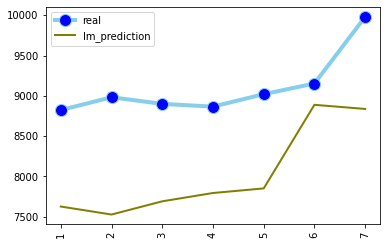

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - May

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)#GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_may, y_train_may)

In [ ]:
# Predict the model on the x_test data
y_pred_may_lasso = pd.DataFrame(lasso.predict(x_test_may))
y_pred_may_lasso['index'] = range(1,8)

In [ ]:
y_pred_may_lasso

,0,index
0,7619.051456,1
1,7540.843968,2
2,7704.844636,3
3,7797.110522,4
4,7814.768118,5
5,8932.928478,6
6,8831.216923,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_lasso, on='index', how='left')

In [ ]:
merge_may

,lm_prediction,index,real,0
0,7626.086948,1,8822.800000,7619.051456
1,7526.599476,2,8982.300000,7540.843968
2,7690.725950,3,8899.800000,7704.844636
3,7793.804550,4,8865.800000,7797.110522
4,7850.899369,5,9020.100000,7814.768118
5,8888.264968,6,9152.470993,8932.928478
6,8836.952715,7,9979.600000,8831.216923


In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_may.real, y_pred = merge_may.lasso_prediction)
np.sqrt(MSE)

1128.6293280870077

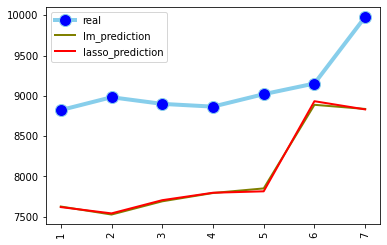

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - May

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_may = pd.DataFrame(y_train_may)

In [ ]:
y_train_may.BTC_close

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_may)
y = sc_y.fit_transform(y_train_may)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'poly')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_may = sc_X.fit_transform(x_test_may)

y_pred_may_svr = SVR_reg.predict(x_test_may)
y_pred_may_svr = sc_y.inverse_transform(y_pred_may_svr) 


y_pred_may_svr = pd.DataFrame(y_pred_may_svr)
y_pred_may_svr['index'] = range(1,8)
y_pred_may_svr

,0,index
0,6233.990297,1
1,6457.953900,2
2,6479.903842,3
3,6640.965524,4
4,6510.529127,5
5,7965.608332,6
6,14049.828929,7


In [ ]:
# merge the prediction and actual data frames
merge_may = merge_may.merge(y_pred_may_svr, on='index', how='left')

In [ ]:
merge_may.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction_rgb', 'svr_prediction_poly']

In [ ]:
merge_may

,lm_prediction,index,real,lasso_prediction,svr_prediction_rgb,svr_prediction_poly
0,7626.086948,1,8822.800000,7619.051456,6058.661102,6233.990297
1,7526.599476,2,8982.300000,7540.843968,5776.526021,6457.953900
2,7690.725950,3,8899.800000,7704.844636,6008.156916,6479.903842
3,7793.804550,4,8865.800000,7797.110522,6429.360692,6640.965524
4,7850.899369,5,9020.100000,7814.768118,6462.714961,6510.529127
5,8888.264968,6,9152.470993,8932.928478,10266.870433,7965.608332
6,8836.952715,7,9979.600000,8831.216923,11074.242543,14049.828929


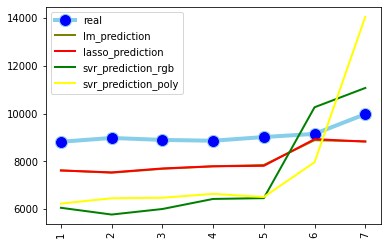

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_may, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_may, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_may, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction_rgb', data=merge_may, marker='', color='green', linewidth=2)
plt.plot( 'index', 'svr_prediction_poly', data=merge_may, marker='', color='yellow', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Linear Model - July

In [ ]:
# Runt he linear regressor over the x and y training data
model = LinearRegression().fit(x_train_july, y_train_july)

In [ ]:
# Runt he linear regressor over the x and y training data
from statsmodels.api import OLS
OLS(y_train_july,x_train_july).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              BTC_close   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8241.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        05:02:31   Log-Likelihood:                         -9371.7
No. Observations:                1131   AIC:                                  1.876e+04
Df Residuals:                    1122   BIC:                                  1.881e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
ETHER_open        1.4717      1.651      0.891      0.373      -1.768       4.712
ETHER_close      -2.3577      1.657     -1.423      0.155      -5.609       0.893
ETHER_vol        -0.0003      0.000     -1.451      0.147      -0.001       0.000
XRP_open      -3442.9932    726.922     -4.736      0.000   -4869.273   -2016.714
XRP_close      2938.4025    739.956      3.971      0.000    1486.550    4390.255
XRP_vol       -1.306e-06   6.39e-07     -2.042      0.041   -2.56e-06   -5.12e-08
BTC_open_dup      0.1473      0.094      1.560      0.119      -0.038       0.332
BTC_close_dup     0.8783      0.094      9.367      0.000       0.694       1.062
BTC_vol_dup       0.0158      0.002      8.462      0.000       0.012       0.019
==============================================================================
Omnibus:                      157.657   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1921.012
Skew:                           0.006   Prob(JB):                         0.00
Kurtosis:                       9.385   Cond. No.                     2.65e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predict the model on the x_test data
y_pred_july = pd.DataFrame(model.predict(x_test_july))
y_pred_july['index'] = range(1,8)

In [ ]:
y_test_july = pd.DataFrame(y_test_july)[0:7]
y_test_july['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = y_pred_july.merge(y_test_july, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lm_prediction)
np.sqrt(MSE)

127.55786750036722

In [ ]:
# Calculate the r_square value for the linear model
r_sq = model.score(x_train_july, y_train_july)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8942229300571196


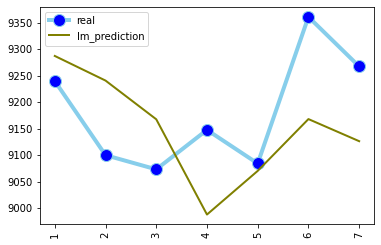

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Lasso Regression - July

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

In [ ]:
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [ ]:
lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv=5)

In [ ]:
lasso = lasso_regressor.fit(x_train_july, y_train_july)

In [ ]:
print(lasso.best_params_)

{'alpha': 1e-15}


In [ ]:
print(lasso.best_score_)

-997010.4666424043


In [ ]:
# Predict the model on the x_test data
y_pred_july_lasso = pd.DataFrame(lasso.predict(x_test_july))
y_pred_july_lasso['index'] = range(1,8)

In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_lasso, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction']

In [ ]:
MSE = mean_squared_error(y_true = merge_july.real, y_pred = merge_july.lasso_prediction)
np.sqrt(MSE)

127.57497646038792

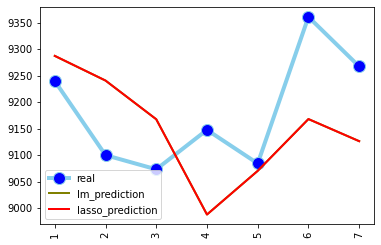

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()

# Support Vector Regression - July

In [ ]:
# Import the algorithm package
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
y_train_july = pd.DataFrame(y_train_july)

In [ ]:
#3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train_july)
y = sc_y.fit_transform(y_train_july)

In [ ]:
y = y[:, 0]

In [ ]:
# Load the SVR and fit
#svr = SVR(kernel='poly')
svr_regressor = SVR(kernel = 'rbf')
SVR_reg = svr_regressor.fit(X, y)

In [ ]:
# Predict the model on the x_test data
x_test_july = sc_X.fit_transform(x_test_july)

y_pred_july_svr = SVR_reg.predict(x_test_july)
y_pred_july_svr = sc_y.inverse_transform(y_pred_july_svr) 


y_pred_july_svr = pd.DataFrame(y_pred_july_svr)
y_pred_july_svr['index'] = range(1,8)
y_pred_july_svr

,0,index
0,11114.335817,1
1,9753.279073,2
2,7710.265580,3
3,6254.006371,4
4,6684.506516,5
5,8418.032689,6
6,7517.340586,7


In [ ]:
# merge the prediction and actual data frames
merge_july = merge_july.merge(y_pred_july_svr, on='index', how='left')

In [ ]:
merge_july.columns = ['lm_prediction', 'index', 'real', 'lasso_prediction', 'svr_prediction']

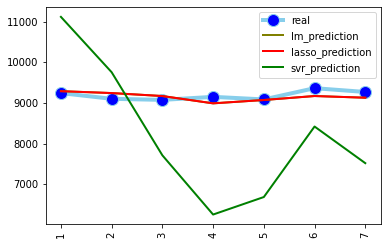

In [ ]:
# Plot the predicted vs actual in matplot lib
import matplotlib.pyplot as plt
plt.plot( 'index', 'real', data=merge_july, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'index', 'lm_prediction', data=merge_july, marker='', color='olive', linewidth=2)
plt.plot( 'index', 'lasso_prediction', data=merge_july, marker='', color='red', linewidth=2)
plt.plot( 'index', 'svr_prediction', data=merge_july, marker='', color='green', linewidth=2)
plt.xticks(rotation='vertical')
plt.legend()